In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv("C://Users//Anubhav//Desktop//Data Science//CAR PREDICTOR USING LINEAR REGRESSION//quikr_car.csv")

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()
#there are some null values in 4 and 5 th column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## problems

year has so many waste info and we need to convert the non-year values to int

price has 'ask for price' which is strinf and we need to remove it

kms_driven has kms with integer, convert it from object to int, has some nan values

fuel_type has some nan value

in name take only first three values

In [6]:
backup=car.copy()

### CLEANING

**YEAR COLUNM**

In [7]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [8]:
car=car[car['year'].str.isnumeric()]

#HERE WE HAVE TAKEN ONLY THOSE VALUES WHICH IS NUMERIC AND FILTER ONLY THOSE WHICH IS NUMERIC AND MAKE IT TO CAR DATASET

In [9]:
car['year']= car['year'].astype(int)
#cahnging the data type of year column into int type

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


### PRICE COLUMN

In [12]:
car['Price']
# NEED TO RMEOVE THAT Ask for price

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [13]:
car=car[car['Price'] != "Ask For Price"]

In [14]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [17]:
#NOW WE WILL REMOVE COMMA and converting it into int type
car['Price']=car['Price'].str.replace(',','').astype(int)

In [18]:
car['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


## KM COLUMN

In [20]:
car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [21]:
# we will remove kms by splitting and only take the first index 
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0)
car['kms_driven']

0        45,000
1            40
3        28,000
4        36,000
6        41,000
         ...   
886    1,32,000
888      27,000
889      40,000
890      Petrol
891      Petrol
Name: kms_driven, Length: 819, dtype: object

In [22]:
# now we will replace comma with empty string
car['kms_driven']=car['kms_driven'].str.replace(',', '')
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [23]:
# now we will remove petrol values
car=car[car['kms_driven'].str.isnumeric()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [24]:
# converting into int value type
car['kms_driven']=car['kms_driven'].astype(int)

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


### FUEL COLUMN

In [27]:
#FINDING HOW MANY COLUNM HAS NAN VALUES
#isnull().sum()
car['fuel_type'].isnull().sum()

1

In [28]:
#FINDING THE COLUMNS
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [29]:
# REMOVINF OR FETCHING ONLY THOSE COLUMN WHICH HAS NO NAN VALUES
car=car[~car['fuel_type'].isna()]
car['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 816, dtype: object

### NAME COLUMN

In [30]:
car['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [31]:
# we will split them and slice them up to 0 to 3 to get first three word and join them
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car['name']

C:\Users\Anubhav\AppData\Local\Temp\ipykernel_25268\2122401427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')


0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [32]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [33]:
# we will adjust the index as they are like 1 3 6 
car = car.reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


### ANALYZING THE DATA

In [34]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


### PRICE COLUMN

<Axes: >

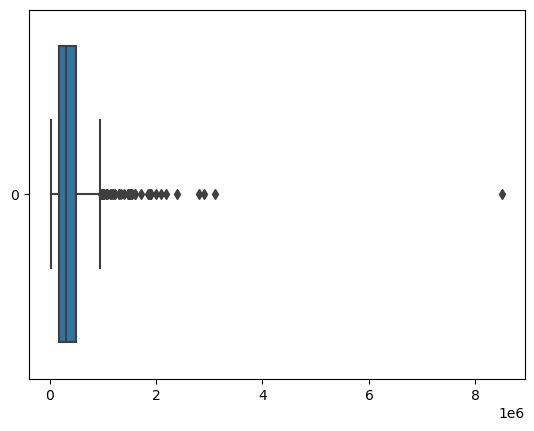

In [35]:
#WE SEE THAT PRICE OF MOST OF THE CAR IS BELOW 60 L HENCE THERE MAY BE OUTLIERS

sns.boxplot(car['Price'], orient="h")


In [36]:
# give me those car which has car price over 60 L
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [37]:
car= car[car['Price']<6e6].reset_index(drop=True)

In [38]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [39]:
# we have stored the cleaned data
car.to_csv('cleaned car.csv')

### SOME OTHER PLOTS

<Axes: ylabel='year'>

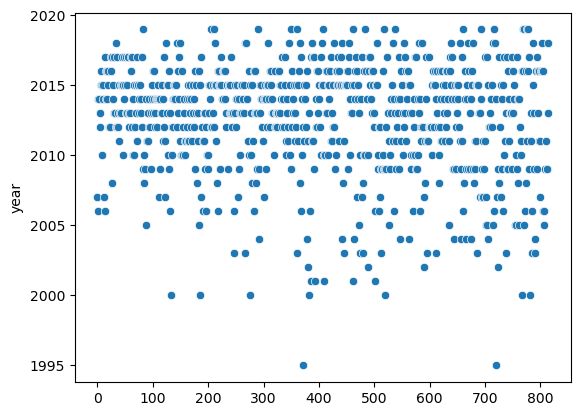

In [40]:
sns.scatterplot(car['year'])

<Axes: xlabel='fuel_type', ylabel='count'>

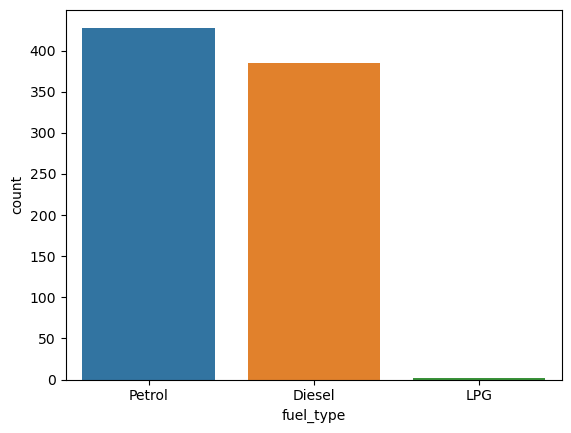

In [41]:
sns.countplot(x='fuel_type', data=car)

In [42]:
# value_counts = car['column'].value_counts()

# Bar plot
# plt.bar(value_counts.index, value_counts.values)
# plt.xlabel('Company name')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of company Column')
# plt.show()

### MODEL BUILDING

In [43]:
# EXTRACTS THE FEATURES 
x = car.drop(columns='Price') # price is not a feature column
y=car['Price'] # it is target colunm

In [44]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [47]:
ohe = OneHotEncoder()

In [48]:
ohe.fit(x[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [49]:
#ohe.categories_

In [50]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
                                      remainder = 'passthrough')

In [51]:
lr = LinearRegression()

In [52]:
pipe = make_pipeline(column_trans, lr)

In [53]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [54]:
# PREDICTION OF TEST DATA
y_pred=pipe.predict(x_test)

In [55]:
#y_pred

In [56]:
r2_score(y_test, y_pred)
# this too low 

0.5255540987853111

In [57]:
# we acn find a better r2 score by using it random state (for which i value it has maximum value) and store it i score (r2_score)
# we acn use many times as we want for better r2 score
score=[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(x_train, y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test, y_pred))
    

In [58]:
import numpy as np

In [59]:
# for which i th terms it gives maximum r2 score
np.argmax(score)

433

In [60]:
# and it is ..
score[np.argmax(score)]

0.8456957793726847

In [61]:
# so we will tarin it now using this random state (you could have used this random_State in above model too all are corrext)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.argmax(score))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
score.append(r2_score(y_test, y_pred))
r2_score(y_test, y_pred)
    

0.8456957793726847

In [62]:
# now dropping this pipeline i.e exporting the pipeine and predicting
import pickle

In [63]:
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

In [64]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019 , 100 , 'Petrol']], columns=['name', 'company', 'year','kms_driven','fuel_type'] ))

array([458934.66740154])